In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,NaN,4.0,4.0,NaN,2.0,7.0,8.0,2.0,NaN,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,NaN,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,NaN,8.0,5.0,10.0,11.0,2.0,8.0,2.0,NaN,5.0,10.0,NaN
3,4.0,9.0,5.0,NaN,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,NaN,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,NaN,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1500
float64		column 2	2250
float64		column 3	3250
float64		column 4	1750
float64		column 5	1750
float64		column 6	2250
float64		column 7	2750
float64		column 8	1250
float64		column 9	2000
float64		column 10	2500
float64		column 11	2500
float64		column 12	1750
float64		column 13	1000
float64		column 14	2250
float64		column 15	2000
float64		column 16	1250
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,18500.000000,17750.000000,16750.000000,18250.000000,18250.000000,17750.000000,17250.000000,18750.000000,18000.000000,17500.000000,17500.000000,18250.000000,19000.000000,17750.000000,18000.000000,18750.00000,0.0
mean,4.021081,7.060563,5.105791,5.374685,3.491562,6.909239,7.481101,4.613387,5.180889,8.261257,6.434629,7.925479,3.043737,8.328507,3.688000,7.81024,NaN
std,1.889049,3.246080,1.923340,2.211685,2.135490,1.948037,2.183749,2.640297,2.332029,2.404606,2.503877,2.022920,2.304732,1.474280,2.499756,1.58347,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

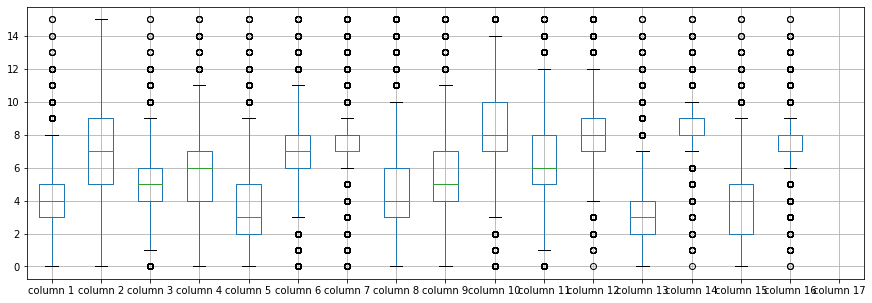

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.021081
column 2     7.060563
column 3     5.105791
column 4     5.374685
column 5     3.491562
column 6     6.909239
column 7     7.481101
column 8     4.613387
column 9     5.180889
column 10    8.261257
column 11    6.434629
column 12    7.925479
column 13    3.043737
column 14    8.328507
column 15    3.688000
column 16    7.810240
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.747238,0.840681,0.660260,0.606246,-0.034325,0.046626,0.016477,0.044664,0.147478,0.037888,-0.046508,0.482569,0.106020,0.257893,-0.103369,NaN
column 2,0.747238,1.000000,0.653198,0.814525,0.535869,0.038623,-0.040912,-0.022191,0.087583,0.158331,-0.051328,-0.008104,0.270699,-0.003047,0.216835,-0.040823,NaN
column 3,0.840681,0.653198,1.000000,0.640319,0.745297,0.055057,0.029096,-0.089211,0.054619,0.109246,0.013212,-0.045641,0.537116,0.050369,0.239928,-0.116919,NaN
column 4,0.660260,0.814525,0.640319,1.000000,0.627128,0.036838,-0.028355,0.085544,0.052886,0.006181,-0.013764,0.028229,0.261417,0.019044,0.282128,-0.018542,NaN
column 5,0.606246,0.535869,0.745297,0.627128,1.000000,0.127370,-0.027020,-0.002299,-0.066657,-0.070233,-0.070827,-0.039896,0.613292,0.019914,0.467641,-0.056768,NaN
column 6,-0.034325,0.038623,0.055057,0.036838,0.127370,1.000000,-0.340222,-0.049409,-0.114663,0.067089,-0.331863,-0.029282,0.134171,-0.221393,0.119698,0.237859,NaN
column 7,0.046626,-0.040912,0.029096,-0.028355,-0.027020,-0.340222,1.000000,-0.114366,-0.051143,0.156346,0.558688,-0.248134,-0.026310,0.520956,-0.072627,-0.194517,NaN
column 8,0.016477,-0.022191,-0.089211,0.085544,-0.002299,-0.049409,-0.114366,1.000000,-0.182908,-0.310038,0.037840,0.080239,0.138289,-0.080837,0.016100,0.176272,NaN
column 9,0.044664,0.087583,0.054619,0.052886,-0.066657,-0.114663,-0.051143,-0.182908,1.000000,0.125696,-0.067768,0.103589,-0.372614,-0.057220,0.270738,-0.057409,NaN
column 10,0.147478,0.158331,0.109246,0.006181,-0.070233,0.067089,0.156346,-0.310038,0.125696,1.000000,0.038674,-0.109170,-0.167991,0.032356,-0.085534,-0.106725,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+10,17+10+10,17+10+10+10,17+10+10,17+10,17], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 66.85071936950683
Epoch: 1 , loss: 43.86251767578125
Epoch: 2 , loss: 41.00388109130859
Epoch: 3 , loss: 39.604066876220706
Epoch: 4 , loss: 38.67347219696045
Epoch: 5 , loss: 38.4273247833252
Epoch: 6 , loss: 37.931251835632324
Epoch: 7 , loss: 37.814846464538576
Epoch: 8 , loss: 37.31249720611572
Epoch: 9 , loss: 37.32338773651123
Epoch: 10 , loss: 37.1139645690918
Epoch: 11 , loss: 37.13932738037109
Epoch: 12 , loss: 36.911880517578126
Epoch: 13 , loss: 36.89090943603516
Epoch: 14 , loss: 36.679646572875974
Epoch: 15 , loss: 36.65279301300049
Epoch: 16 , loss: 36.5757396774292
Epoch: 17 , loss: 36.50337863769531
Epoch: 18 , loss: 36.485880030822756
Epoch: 19 , loss: 36.46796172332763
Epoch: 20 , loss: 36.334039474487305
Epoch: 21 , loss: 36.33751992492676
Epoch: 22 , loss: 36.2310055267334
Epoch: 23 , loss: 36.36171563873291
Epoch: 24 , loss: 36.26269941253662
Epoch: 25 , loss: 36.239342366027834
Ep

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.002764
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.17587,0.0,0.0,2.661367,0.0,0.000000,0.0,0.0,-3.465381,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,NaN
1,0.00000,0.0,0.0,0.000000,0.0,0.148993,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,NaN
2,0.00000,0.0,0.0,0.000000,0.0,-2.415184,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.718341,0.0,0.000000,NaN
3,0.00000,0.0,0.0,-2.201565,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,NaN
4,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,-0.269906,NaN
19996,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,NaN
19997,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,NaN
19998,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-1.365197,0.0,0.000000,0.0,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

555.0204037835523

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.1486469452462472

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      5.969311
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.006800
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,4.17587,4.0,4.0,5.661367,2.0,7.000000,8.0,2.0,5.534619,11.0,7.000000,7.000000,1.0,8.000000,5.0,6.000000,-0.005520
1,4.00000,7.0,5.0,5.000000,5.0,5.148993,9.0,6.0,4.000000,8.0,7.000000,9.000000,2.0,9.000000,7.0,10.000000,-0.000174
2,7.00000,10.0,8.0,7.000000,4.0,5.584816,8.0,5.0,10.000000,11.0,2.000000,8.000000,2.0,6.718341,5.0,10.000000,-0.003158
3,4.00000,9.0,5.0,4.798435,4.0,7.000000,7.0,13.0,1.000000,7.0,6.000000,8.000000,3.0,8.000000,0.0,8.000000,-0.001195
4,6.00000,7.0,8.0,5.000000,4.0,7.000000,6.0,3.0,7.000000,10.0,7.000000,9.000000,3.0,8.000000,3.0,7.000000,-0.010625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.00000,10.0,5.0,8.000000,3.0,4.000000,10.0,7.0,8.000000,12.0,10.000000,9.000000,2.0,9.000000,2.0,5.730094,-0.000455
19996,4.00000,7.0,6.0,5.000000,3.0,7.000000,8.0,2.0,10.000000,12.0,6.000000,8.000000,1.0,9.000000,6.0,8.000000,0.000690
19997,4.00000,8.0,4.0,6.000000,4.0,7.000000,8.0,7.0,4.000000,10.0,7.000000,6.000000,3.0,9.000000,3.0,7.000000,-0.003103
19998,4.00000,11.0,4.0,8.000000,3.0,0.000000,2.0,4.0,6.000000,1.0,0.000000,5.634803,0.0,8.000000,0.0,8.000000,-0.003246


In [21]:
imputations[-1].to_excel("Letter_NG_10(imp).xlsx", index=False, header=False)